In [131]:
import pandas as pd

In [132]:
from matplotlib import pyplot as plt

In [133]:
import seaborn as sns

In [134]:
import numpy as np

In [135]:
from collections import Counter

In [136]:
#Leggo i file
Info = pd.read_csv("data/Information_data Final Project.csv")

In [137]:
#Leggo i primi 5 record del dataset sulle informazioni
Info.head()

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
0,19-2-2022,190,sport,117,fr,long,fr,28-6-2021,tablet,331708,2
1,25-2-2021,243,art,117,it,short,it,24-8-2020,tablet,5128,3
2,19-12-2023,36,weather,115,en,long,uk,7-2-2021,tablet,733403,5
3,27-3-2023,162,finance,111,it,short,it,6-9-2022,tablet,612638,1
4,22-10-2023,181,economy,119,fr,short,fr,9-12-2020,tablet,211458,3


In [138]:
#Esploro i campi del dataset sulle informazioni
Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   read_date          999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   journalist_id      999 non-null    int64 
 4   language           999 non-null    object
 5   length             999 non-null    object
 6   country            999 non-null    object
 7   subscription_date  999 non-null    object
 8   platform           999 non-null    object
 9   article_id         999 non-null    int64 
 10  stars              999 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 86.0+ KB


In [139]:
#Verifico i limiti del dataset 
Info.shape

(999, 11)

In [140]:
#Verifico quanti articoli sono stati scritti
len(Info['article_id'].unique())

987

In [141]:
#Preparo un subset di dati per dopo che contenga gli articoli univoci
Unique_articles = Info.drop_duplicates(subset='article_id')

In [142]:
#Conto le letture degli articoli, in ordine decrescente di default
#La maggior parte degli articoli ha un lettore, il numero massimo di letture per un articolo è 3
Counter(Info['article_id'])

Counter({732108: 3,
         612403: 2,
         312698: 2,
         332489: 2,
         733605: 2,
         722624: 2,
         622996: 2,
         622798: 2,
         112469: 2,
         633277: 2,
         73364: 2,
         331708: 1,
         5128: 1,
         733403: 1,
         612638: 1,
         211458: 1,
         531439: 1,
         612187: 1,
         723993: 1,
         623177: 1,
         6123: 1,
         723610: 1,
         32252: 1,
         733412: 1,
         732766: 1,
         112510: 1,
         622848: 1,
         612855: 1,
         632401: 1,
         313130: 1,
         631847: 1,
         713623: 1,
         633862: 1,
         711175: 1,
         231516: 1,
         5333: 1,
         123924: 1,
         722711: 1,
         132589: 1,
         323731: 1,
         233287: 1,
         731638: 1,
         613114: 1,
         32288: 1,
         231707: 1,
         331144: 1,
         733764: 1,
         733527: 1,
         722863: 1,
         322888: 1,
         

In [143]:
#Verifico quanti utenti sono iscritti
#Sembrerebbe che per 987 articoli abbiamo un buon rapporto di 242 lettori
len(Info['user_uuid'].unique())

242

In [144]:
#Verifico i lettori più affiatati
#L'utente che ha letto più articoli ne ha letti 12
Counter(Info['user_uuid'])

Counter({157: 12,
         181: 10,
         241: 10,
         98: 10,
         51: 10,
         13: 10,
         102: 9,
         115: 9,
         18: 9,
         219: 8,
         90: 8,
         135: 8,
         39: 8,
         46: 8,
         163: 7,
         221: 7,
         14: 7,
         6: 7,
         72: 7,
         187: 7,
         209: 7,
         145: 7,
         114: 7,
         33: 7,
         199: 7,
         208: 6,
         15: 6,
         237: 6,
         205: 6,
         142: 6,
         143: 6,
         123: 6,
         226: 6,
         140: 6,
         172: 6,
         94: 6,
         195: 6,
         40: 6,
         149: 6,
         19: 6,
         188: 6,
         106: 6,
         99: 6,
         80: 6,
         146: 6,
         232: 6,
         147: 6,
         34: 6,
         82: 6,
         100: 6,
         2: 6,
         240: 6,
         151: 6,
         148: 6,
         120: 6,
         104: 6,
         190: 5,
         162: 5,
         170: 5,
         71: 

In [145]:
#Verifico quanti giornalisti scrivono
#Abbiamo 23 giornalisti per 987 articoli
len(Info['journalist_id'].unique())

23

In [146]:
#Verifico i giornalisti che hanno scritto di più
#Il giornalista che ha scritto più articoli ne ha scritti 54
Counter(Unique_articles['journalist_id'])

Counter({113: 54,
         122: 53,
         112: 52,
         101: 49,
         111: 47,
         114: 47,
         119: 46,
         110: 45,
         117: 44,
         107: 44,
         104: 43,
         115: 42,
         116: 42,
         106: 42,
         100: 42,
         120: 41,
         103: 39,
         118: 38,
         108: 38,
         105: 37,
         121: 35,
         109: 34,
         102: 33})

In [147]:
#Ottengo una descrizione statistica della category
#La categoria di cui si è scritto di più è il tempo
Info['category'].describe()

count         999
unique          7
top       weather
freq          321
Name: category, dtype: object

In [148]:
#Ottengo un conteggio per Category
CatFreq = Unique_articles['category'].value_counts()

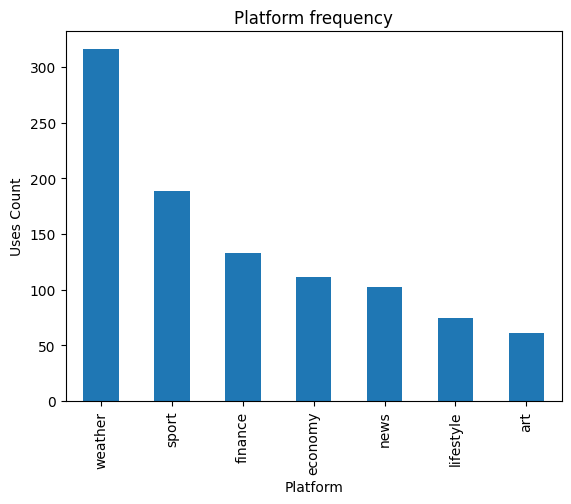

In [149]:
#Creo un grafico che mostri quanti articoli sono stati scritti per ogni categoria
CatFreq.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Uses Count')
plt.title('Platform frequency')
plt.show()

In [150]:
#Verifico quanti e quali articoli sono stati scritti per la categoria news
Unique_articles.loc[Unique_articles['category'] == 'news']

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
16,24-10-2023,194,news,115,it,short,it,21-8-2021,mobile,612855,2
21,8-4-2023,105,news,105,en,long,uk,25-1-2022,mobile,633862,2
58,1-11-2023,162,news,111,en,medium,uk,6-9-2022,pc,623283,4
68,4-10-2021,94,news,103,it,long,it,24-3-2020,pc,632117,5
99,3-4-2023,166,news,113,it,short,it,22-7-2021,tablet,612409,5
...,...,...,...,...,...,...,...,...,...,...,...
953,11-2-2023,69,news,102,fr,long,fr,23-8-2020,tablet,631990,5
963,28-7-2022,181,news,110,it,long,it,9-12-2020,tablet,632862,1
972,4-11-2023,105,news,115,it,long,it,25-1-2022,mobile,632230,2
974,20-12-2023,92,news,107,en,short,uk,24-10-2021,pc,613798,4


In [151]:
#Verifico quanti e quali articoli sono stati scritti per la categoria art
Unique_articles.loc[Unique_articles['category'] == 'art']

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
1,25-2-2021,243,art,117,it,short,it,24-8-2020,tablet,5128,3
5,8-2-2023,163,art,120,fr,long,fr,28-11-2022,tablet,531439,4
24,13-3-2023,96,art,102,en,long,uk,3-12-2020,pc,5333,4
51,11-7-2022,123,art,103,fr,short,fr,19-9-2021,tablet,511794,3
55,10-8-2022,226,art,112,fr,long,fr,4-10-2020,tablet,531592,4
...,...,...,...,...,...,...,...,...,...,...,...
922,25-10-2023,82,art,108,en,long,uk,21-1-2022,tablet,53394,1
948,26-12-2022,14,art,104,it,long,it,14-1-2021,pc,532626,1
980,4-5-2023,51,art,105,fr,long,fr,9-7-2022,pc,531180,1
985,12-3-2023,15,art,105,fr,short,fr,13-5-2022,pc,511321,2


In [152]:
#Verifico quanti e quali articoli sono stati scritti per la categoria weather
Unique_articles.loc[Unique_articles['category'] == 'weather']

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
2,19-12-2023,36,weather,115,en,long,uk,7-2-2021,tablet,733403,5
7,18-9-2023,221,weather,110,en,medium,uk,25-4-2021,tablet,723993,5
10,21-5-2023,206,weather,111,en,medium,uk,7-11-2020,pc,723610,4
12,11-5-2023,15,weather,107,en,long,uk,13-5-2022,pc,733412,2
13,8-7-2021,157,weather,111,it,long,it,12-2-2020,tablet,732766,5
...,...,...,...,...,...,...,...,...,...,...,...
987,10-10-2022,67,weather,120,en,short,uk,1-10-2020,pc,713181,5
988,15-7-2023,211,weather,119,en,medium,uk,17-10-2021,tablet,72370,4
992,4-4-2023,7,weather,117,it,long,it,1-9-2021,mobile,732418,2
995,1-11-2023,52,weather,110,en,short,uk,15-3-2022,pc,713633,3


In [153]:
#Verifico quanti sono i dispositivi usati per la lettura
len(Info['platform'].unique())

3

In [154]:
#Conto con quale frequenza vengono usati i dispositivi
PlatformFreq = Info['platform'].value_counts()

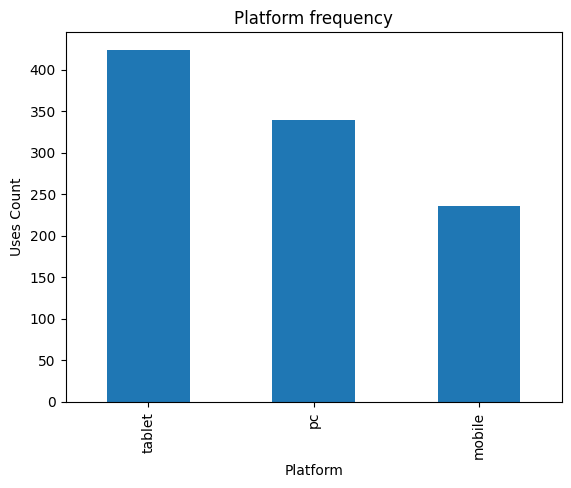

In [155]:
#Creo un grafico che mostri la frequenza di utilizzo dei dispositivi
#Il dispositivo più usato è il tablet
PlatformFreq.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Uses Count')
plt.title('Platform frequency')
plt.show()

In [156]:
#Conto qual'è la lingua più letta
LangFreq = Info['language'].value_counts()

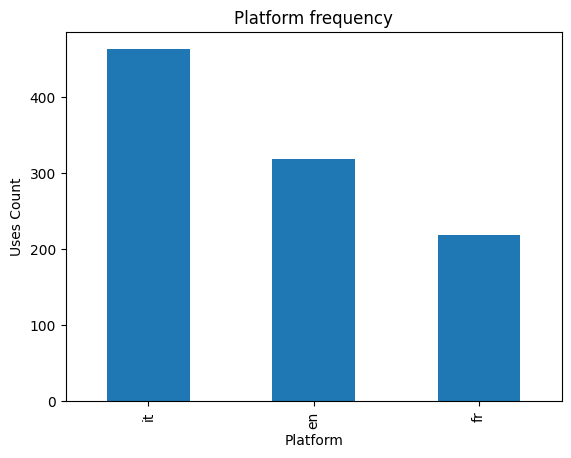

In [157]:
#Creo un grafico che mostri la lingua più usata
#La lingua più letta è l'italiano
LangFreq.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Uses Count')
plt.title('Platform frequency')
plt.show()

In [158]:
#Verifico la frequenza della nazionalità degli utenti
CountryFreq = Info['country'].value_counts()

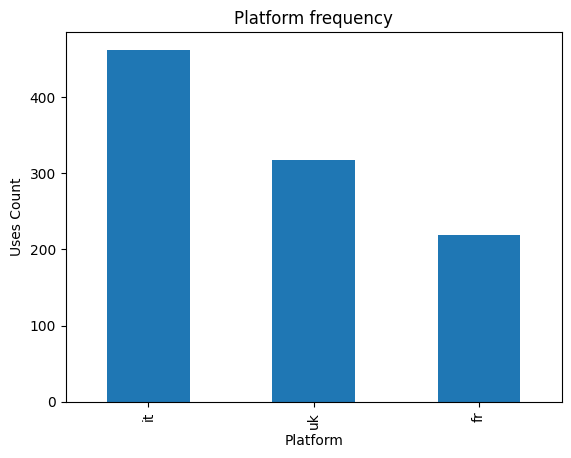

In [159]:
#Creo un grafico che la frequenza della nazionalità degli utenti
#La lingua più letta è l'italiano
CountryFreq.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Uses Count')
plt.title('Platform frequency')
plt.show()

In [160]:
#Conto con quale frequenza vengono scritti articoli lunghi/brevi
LenFreq = Unique_articles['length'].value_counts()

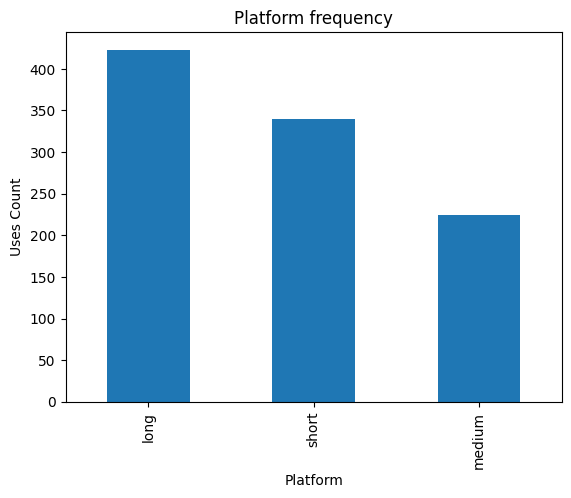

In [161]:
#Creo un grafico che mostri con quale frequenza vengono scritti articoli lunghi/brevi
#Gli articoli più scritti sono quelli lunghi
LenFreq.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Uses Count')
plt.title('Platform frequency')
plt.show()

In [162]:
#Verifico la media delle recensioni per lunghezza
#Mi serve a capire se piacciono di più articoli brevi o meno
Info.groupby('length')['stars'].mean()

length
long      2.948718
medium    2.991189
short     3.029155
Name: stars, dtype: float64

In [163]:
#Verifico la media delle recensioni per giornalista
#Mi serve a capire se i giornalisti che scrivono di più come visto sopra sono anche i più quotati o no
Info.groupby('journalist_id')['stars'].mean()

journalist_id
100    2.857143
101    3.163265
102    3.147059
103    3.050000
104    2.511628
105    2.513514
106    2.906977
107    3.022727
108    3.289474
109    3.294118
110    3.200000
111    2.875000
112    2.981481
113    2.836364
114    3.187500
115    3.113636
116    2.930233
117    2.750000
118    2.605263
119    3.130435
120    3.024390
121    2.657143
122    3.462963
Name: stars, dtype: float64

In [164]:
#Verifico la media delle recensioni per categoria
#Mi serve a capire se ci sono categorie della quale si è scritto poco ma che possono entusiasmare gli utenti
Info.groupby('category')['stars'].mean()

category
art          3.180328
economy      3.000000
finance      2.873134
lifestyle    3.157895
news         3.209524
sport        2.780105
weather      3.000000
Name: stars, dtype: float64

In [165]:
#Converto il tipo di dato delle date da oggetto a datetime per poterle poi confrontare
Info['read_date'] = pd.to_datetime(Info['read_date'],dayfirst=True)
Info['subscription_date'] = pd.to_datetime(Info['subscription_date'],dayfirst=True)

In [166]:
#Confronto la data di iscrizione con la data di lettura degli articoli per approfondire sulla fidelizzazione degli utenti
Info['fidelity_in_date'] = (Info['read_date'] - Info['subscription_date']).dt.days

In [167]:
#Verifico la differenza tra la data di iscrizione e lettura degli utenti in modo decrescente
Info.sort_values(by='fidelity_in_date', ascending=False)

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars,fidelity_in_date
920,2023-11-11,115,economy,112,en,long,uk,2020-01-08,tablet,233174,4,1403
392,2023-11-01,115,sport,107,en,short,uk,2020-01-08,pc,313606,2,1393
52,2023-11-13,157,finance,107,en,medium,uk,2020-02-12,mobile,623801,4,1370
307,2023-11-12,157,economy,119,it,short,it,2020-02-12,tablet,212923,5,1369
490,2023-11-11,157,weather,118,it,medium,it,2020-02-12,pc,722197,4,1368
...,...,...,...,...,...,...,...,...,...,...,...,...
644,2023-01-05,163,weather,110,it,short,it,2022-11-28,mobile,712264,4,38
519,2023-01-27,106,news,101,it,short,it,2022-12-23,pc,612744,2,35
182,2022-01-07,108,lifestyle,100,it,medium,it,2021-12-08,tablet,122395,5,30
321,2022-01-21,219,lifestyle,122,fr,long,fr,2021-12-24,pc,131218,1,28


In [168]:
#Verifico la media della differenza tra la data di iscrizione e lettura degli utenti per categoria
Info.groupby('category')['fidelity_in_date'].mean()

category
art          527.639344
economy      567.729730
finance      547.619403
lifestyle    525.236842
news         623.076190
sport        539.942408
weather      558.841121
Name: fidelity_in_date, dtype: float64

In [169]:
#Sembrerebbe che gli utenti nonostante la data di iscrizione leggano anche spesso dopo molto tempo gli articoli
#Ci sono alcune categorie per la quale sono stati scritti meno articoli che sembrano attirare di più gli utenti
#Gli articoli brevi sembrano leggermente più apprezzati

#Vedremo come agire in Tableau!